In [189]:
import pandas as pd
import matplotlib.pyplot as plt

In [190]:
class dataset:
    def __init__(self, file):
        self.file = file
        self.df = pd.read_csv(file)
    def dropRow(self, columns = []) -> None:
        if len(columns) == 0:
            self.df = self.df.dropna()
        else:
            self.df = self.df.dropna(subset = columns)
        self.df = self.df.reset_index(drop = True)

    def dropColumns(self, columns = []) -> None:
        self.df = self.df.drop(columns, axis = 1)
    
    def stdDate(self, column = 'Date', format = 'ddmmyyyy') -> None:
        fmt = '%d/%m/%Y'
        if format.lower() in ['dd/mm/yyyy', 'dd-mm-yyyy', 'dd.mm.yyyy', 'ddmmyyyy', 'dd mm yyyy']:
            fmt = '%d/%m/%Y'
        elif format.lower() in ['dd/mm/yy', 'dd-mm-yy', 'dd.mm.yy', 'ddmmyy', 'dd mm yy']:
            fmt = '%d/%m/%y'
        elif format.lower() in ['mm/dd/yyyy', 'mm-dd-yyyy', 'mm.dd.yyyy', 'mmddyyyy', 'mm dd yyyy']:
            fmt = '%m/%d/%Y'
        elif format.lower() in ['mm/dd/yy', 'mm-dd-yy', 'mm.dd.yy', 'mmddyy', 'mm dd yy']:
            fmt = '%m/%d/%y'
        elif format.lower() in ['yyyy/mm/dd', 'yyyy-mm-dd', 'yyyy.mm.dd', 'yyyymmdd', 'yyyy mm dd']:
            fmt = '%Y/%m/%d'
        elif format.lower() in ['yy/mm/dd', 'yy-mm-dd', 'yy.mm.dd', 'yymmdd', 'yy mm dd']:
            fmt = '%y/%m/%d'
        elif format.lower() in ['yy/dd/mm', 'yy-dd-mm', 'yy.dd.mm', 'yyddmm', 'yy dd mm']:
            fmt = '%y/%d/%m'
        self.df[column] = pd.to_datetime(self.df[column], dayfirst = True)
        self.df[column] = self.df[column].dt.strftime(fmt)

    def savetofile(self, file, type = 'csv') -> None:
        if type == 'csv':
            self.df.to_csv(file + '.csv', index = False)
        elif type == 'xlsx':
            self.df.to_excel(file + '.xlsx', index = False)
        elif type == 'json':
            self.df.to_json(file + '.json', orient = 'records', index = True, date_format = 'iso', force_ascii = False)
    
    def dropDuplicates(self, columns = []) -> None:
        if len(columns) == 0:
            self.df = self.df.drop_duplicates()
        else:
            self.df = self.df.drop_duplicates(subset = columns, keep='first')
    
    def normalise(self, columns = []):
        if len(columns) == 0:
            self.df = (self.df - self.df.min()) / (self.df.max() - self.df.min())
        else:
            self.df[columns] = (self.df[columns] - self.df[columns].min()) / (self.df[columns].max() - self.df[columns].min())
    
    def group(self, columns=[]):
        if len(columns)==0:
          print("Provide non empty attribute arguement for groupby")
        else:
          gb= self.df.groupby(columns)
          return gb

    def cleanName(self, column = 'Name', tokenize = False) -> None:
        self.df[column] = self.df[column].str.replace(' ', '')
        for x in range(len(self.df[column])):
            i = 0
            while i < len(self.df[column][x]):
                if self.df[column][x][i].isupper() and i != 0:
                    self.df[column][x] = self.df[column][x][:i] + ' ' + self.df[column][x][i:]
                    i += 1
                i += 1
        if tokenize:
            self.df[column] = self.df[column].str.split(' ')
            for i in range(len(self.df[column])):
                if len(self.df[column][i]) == 2:
                    self.df[column][i].insert(1, '')
            self.df['First Name'] = self.df[column].str[0]
            self.df['Middle Name'] = self.df[column].str[1]
            self.df['Last Name'] = self.df[column].str[2]        
            self.df.drop(column, axis = 1, inplace = True)
    
    def graph(self, x, y) -> None:
        plt.plot(self.df[x].tolist(), self.df[y].tolist())
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

In [191]:
def getgroup(gb_obj,str):
      if(isinstance(gb_obj,pd.core.groupby.generic.DataFrameGroupBy)):
        gg=gb_obj.get_group(str)
        return gg
      else:
        print("object type must be groupby to use functionality")

In [192]:
df = dataset('dropping.csv')
df.df

,Name,DOB,Email
0,ShubhamS Kalantri,09-10-2002,f20201008@goa.bits-pilani.ac.in
1,Krishanu Shah,NaN,f20201728@goa.bits-pilani.ac.in
2,SaraswatiPadmawar,08/10/02,NaN


In [193]:
df.stdDate('DOB', format = 'yyddmm')
df.dropRow(['DOB'])
df.df

,Name,DOB,Email
0,ShubhamS Kalantri,02/09/10,f20201008@goa.bits-pilani.ac.in
1,SaraswatiPadmawar,02/08/10,NaN


In [194]:
df.cleanName('Name', tokenize = True)
df.df

,DOB,Email,First Name,Middle Name,Last Name
0,02/09/10,f20201008@goa.bits-pilani.ac.in,Shubham,S,Kalantri
1,02/08/10,NaN,Saraswati,,Padmawar


In [195]:
df = dataset('sample.csv')
df.df

,x,y
0,1,5
1,2,3
2,3,2
3,4,6
4,5,4
5,6,2


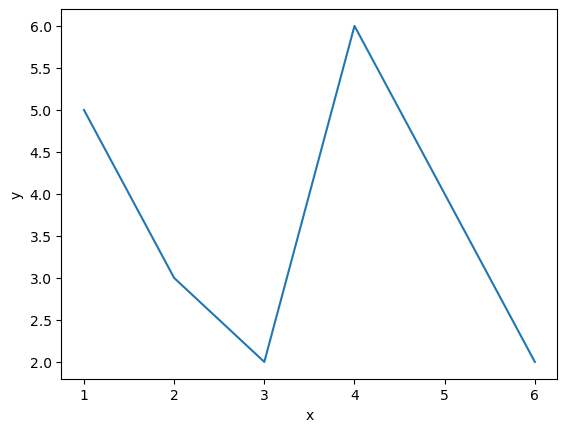

In [196]:
df.graph('x', 'y')

In [197]:
df.df['y'].tolist()

[5, 3, 2, 6, 4, 2]